In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('ford.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.shape

(17966, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [8]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [9]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(154)

# EDA


<Axes: xlabel='price', ylabel='Count'>

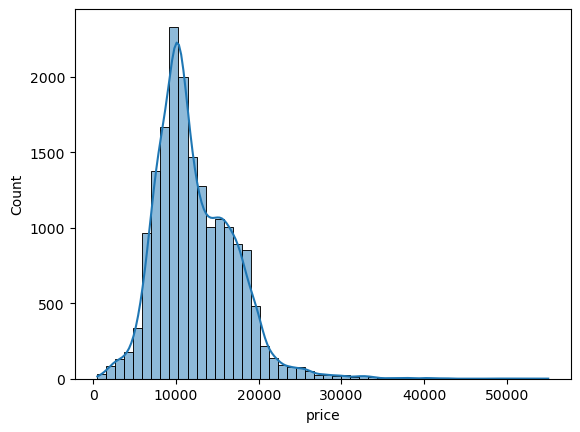

In [20]:
sns.histplot(data=df['price'],bins=50,kde=True)

<Axes: >

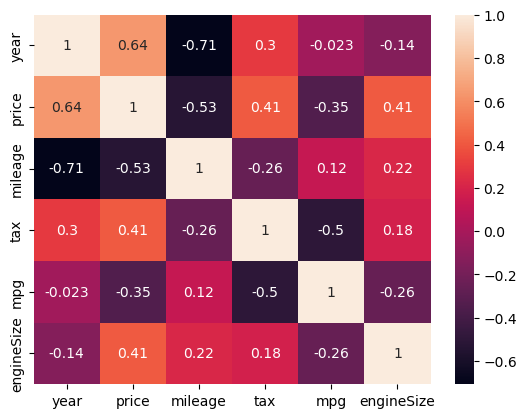

In [21]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='year', ylabel='price'>

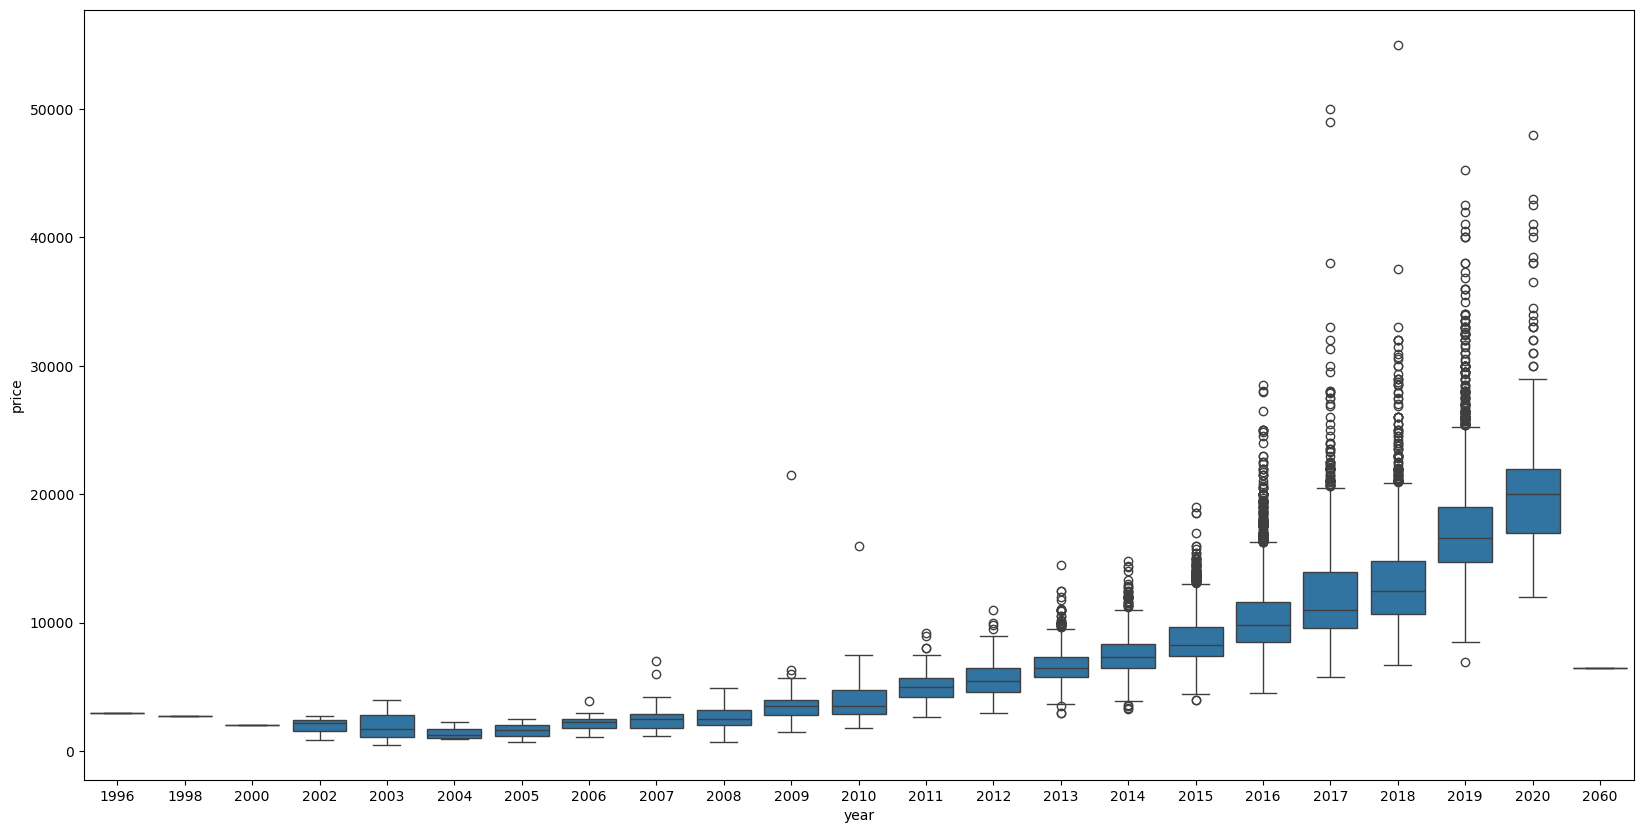

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='year',y='price')

<Axes: xlabel='mileage', ylabel='price'>

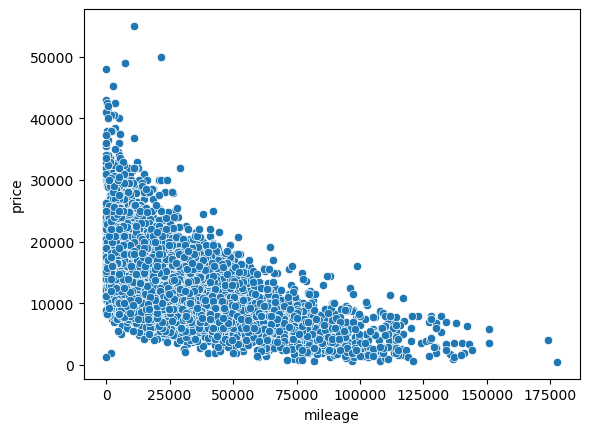

In [27]:
sns.scatterplot(data=df,x='mileage',y='price')

<Axes: xlabel='engineSize', ylabel='price'>

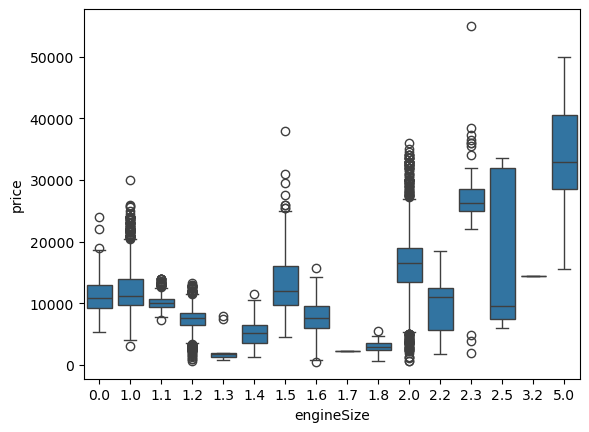

In [28]:
sns.boxplot(data=df,x='engineSize',y='price')

In [29]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='transmission', ylabel='price'>

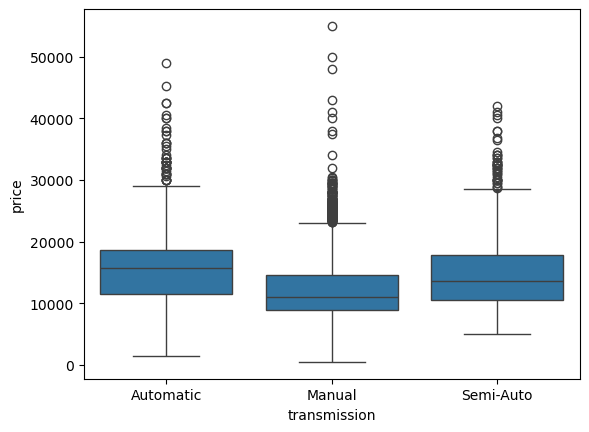

In [30]:
sns.boxplot(data=df,x='transmission',y='price')

<Axes: xlabel='fuelType', ylabel='price'>

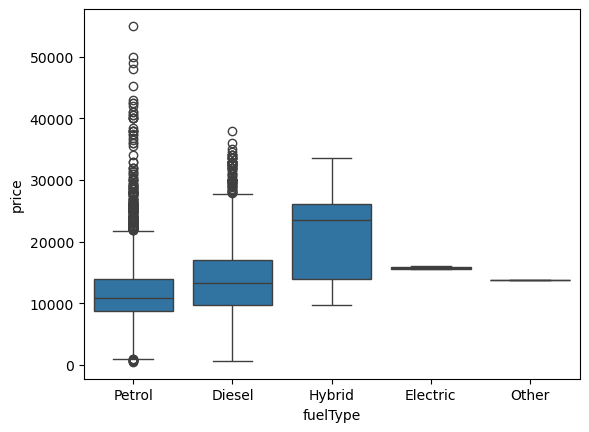

In [31]:
sns.boxplot(data=df,x='fuelType',y='price')

<Axes: xlabel='model', ylabel='price'>

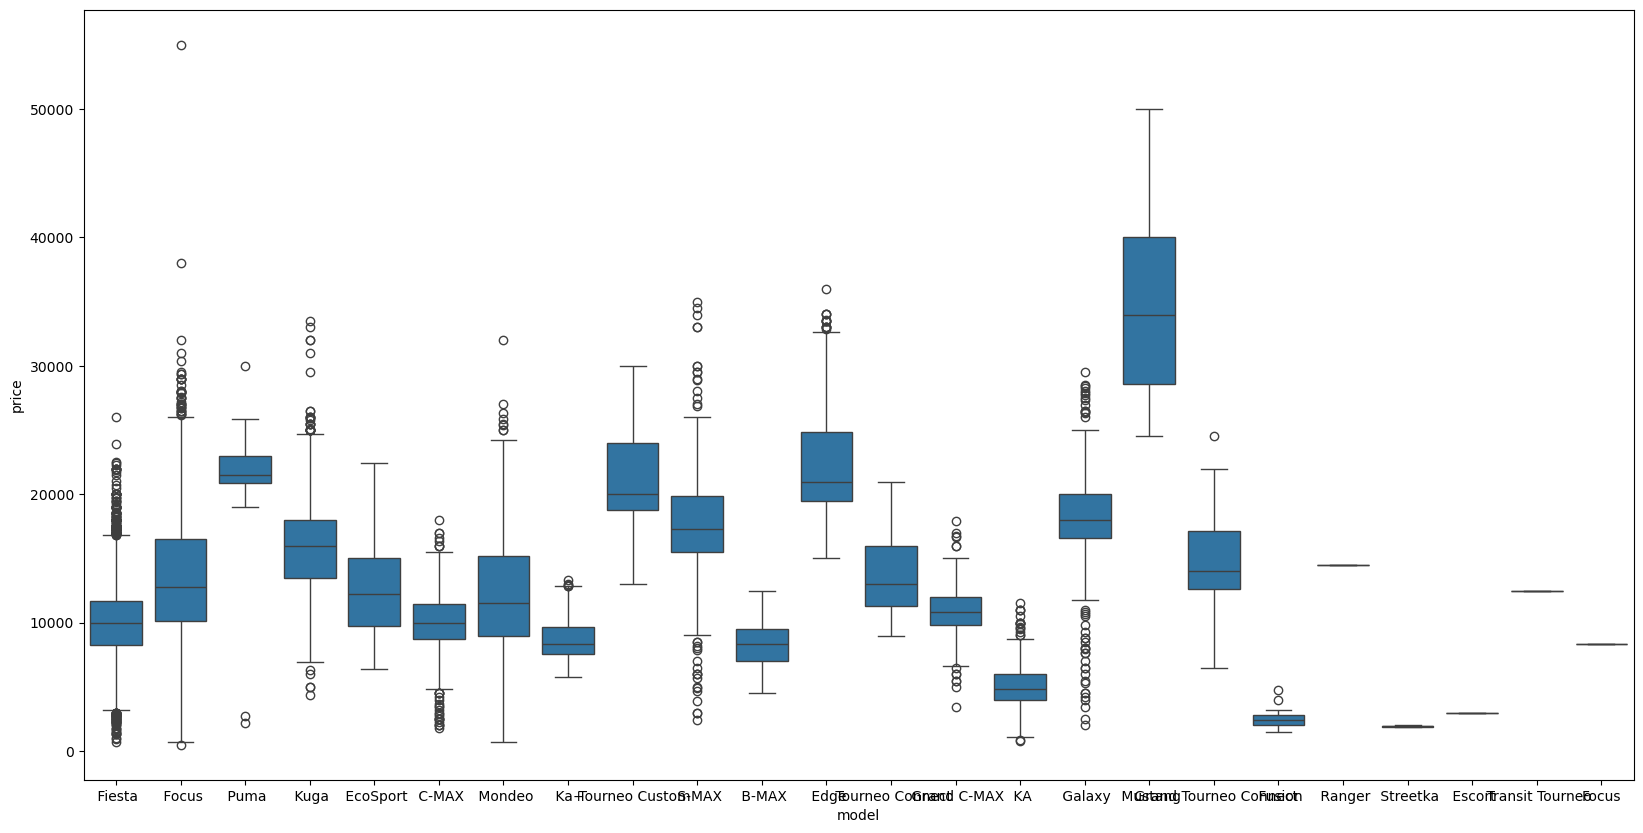

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='model',y='price')

<Axes: xlabel='tax', ylabel='price'>

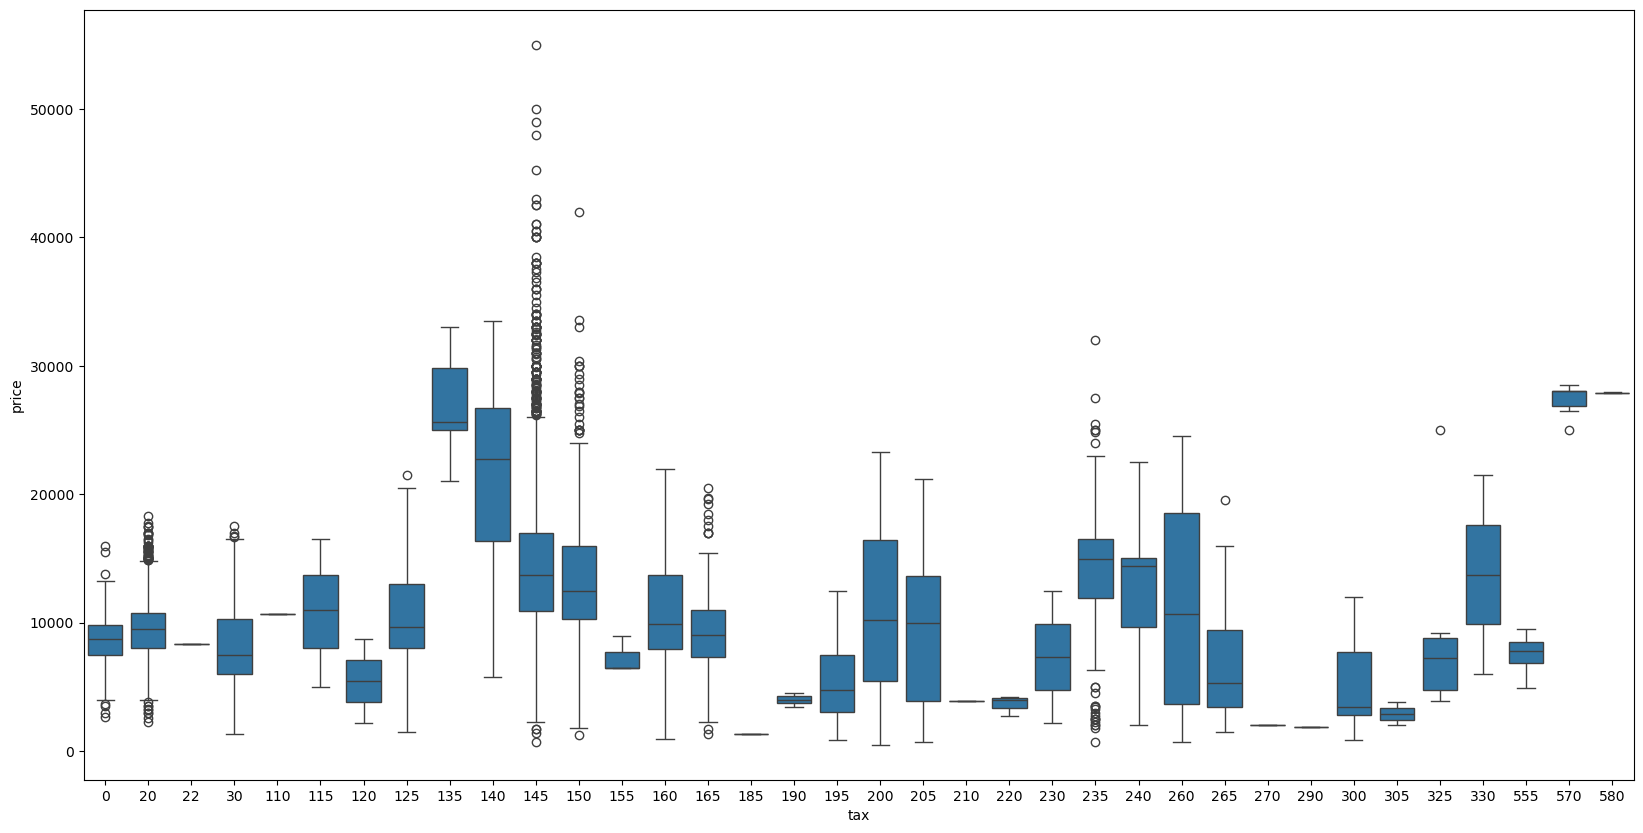

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='tax',y='price')

<Axes: xlabel='mpg', ylabel='price'>

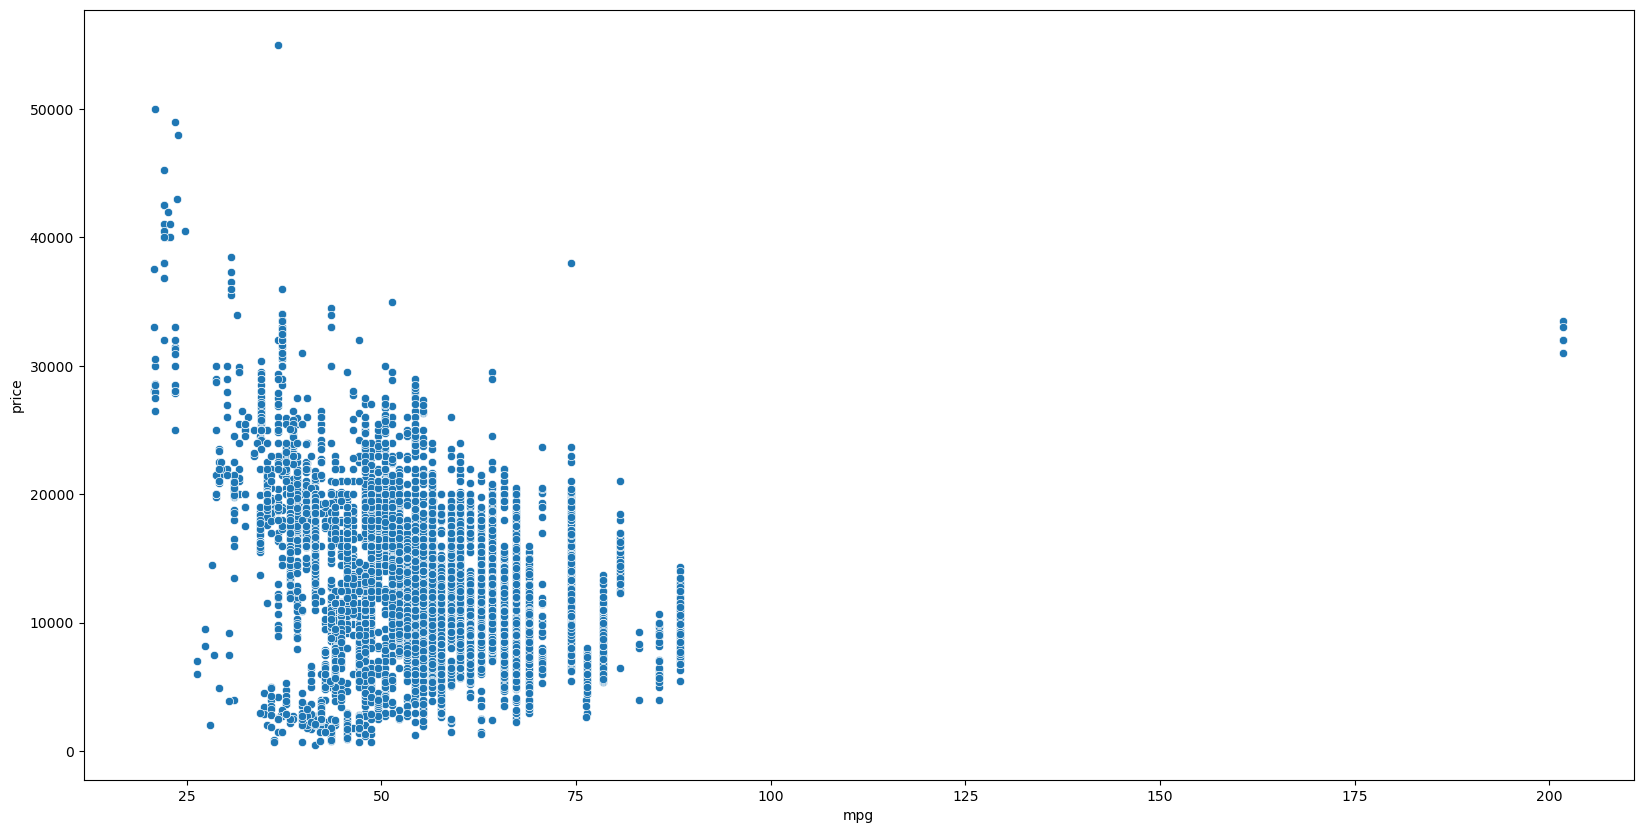

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='mpg',y='price')

In [43]:
X=df.drop('price',axis=1)
y=df['price']

In [44]:
X


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [46]:
columns = ['model','transmission','fuelType']
X_OneEncoded = pd.get_dummies(X,columns=columns,drop_first=True)

In [66]:
X_OneEncoded = X_OneEncoded.astype(int)


In [54]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
columns = ['model','transmission','fuelType']

Xlabel = X
Xlabel

for i in columns:
    Xlabel[i] =encode.fit_transform(Xlabel[i])

In [55]:
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [61]:
a = Xlabel['fuelType'].value_counts()
b = df['fuelType'].value_counts()
print(a,b)

fuelType
4    12179
0     5762
2       22
1        2
3        1
Name: count, dtype: int64 fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


In [68]:
from sklearn.preprocessing import StandardScaler
columns = ['year','mileage','tax','mpg']
standard = StandardScaler()
X_OneEncoded[columns] = standard.fit_transform(X_OneEncoded[columns])


In [69]:
X_OneEncoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.042262,-0.180499,0.389090,0.045110,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.042262,-0.180499,0.389090,0.045110,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.042262,-0.180499,0.389090,0.045110,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.275920,-0.180499,0.389090,-1.431109,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.275920,-1.586151,0.389090,0.045110,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,-0.042262,-0.180499,0.389090,-1.431109,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.360443,-0.180499,-1.439419,0.045110,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.042262,-0.180499,-1.439419,0.045110,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,-0.042262,-0.180499,0.389090,0.045110,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [70]:

columns = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']
Xlabel[columns] = standard.fit_transform(Xlabel[columns])

In [71]:
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


# Machine Learning for One Hot Encoding


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_OneEncoded,y,test_size=0.2)

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
y_pred=model.predict(X_test)

In [98]:
y_pred

array([ 5597.6056818 , 14040.26156951, 10325.81186701, ...,
       14040.26156951, 10639.21279483, 10639.21279483], shape=(3594,))

In [99]:
y_test

2895      5850
17209    17494
17775    12000
3324      8691
17408     8000
         ...  
11416     8000
11960    11250
6875     17000
15336    10300
7595     10600
Name: price, Length: 3594, dtype: int64

In [100]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
r2 = r2_score(y_test,y_pred)
r2

0.7875364578602008

In [101]:
n = X_test.shape[0]
p= X_test.shape[1]
absolute_r2 = 1-((1-r2)*(n-1)) / (n-p-1)
absolute_r2

0.7855067415261875

# Label Encoding

In [102]:
X_train,X_test,y_train,y_test = train_test_split(Xlabel,y,test_size=0.2)

In [103]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
y_pred = model.predict(X_test)

In [109]:
y_pred_train = model.predict(X_train)

In [105]:
y_pred

array([10647.73363862, 15998.32120906,  8241.45618665, ...,
       11761.6766735 , 11512.40749745, 12140.03614934], shape=(3594,))

In [110]:
y_pred_train

array([10300.62458728, 13412.78600167,  2560.75315843, ...,
        7473.82337557,  3165.12733467, 11014.09421105], shape=(14372,))

In [111]:
r2 = r2_score(y_test,y_pred)

In [112]:
r2

0.7069935161794844

In [108]:
n = X_test.shape[0]
p= X_test.shape[1]
absolute_r2 = 1-((1-r2)*(n-1)) / (n-p-1)
absolute_r2

0.7063396662853243